In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sympy  as sp
import mpmath as mp

## Sine Integral ##

Mostly as an excuse to play with SymPy and asymptotic series, let's consider the sine integral:
$$
\mathrm{Si}(x) = \int_0^x\frac{\sin t}{t}\ dt
$$
This is an entire function, and is odd in $x$ for real values.  For small $x$ the Taylor series converges rapidly
$$
\mathrm{Si}(x) = \sum_{k=0}^\infty\frac{(-1)^k x^{2k+1}}{(2k+1)(2k+1)!}
$$
For large $x$ you can get an asymptotic series through integration by parts.  First let's consider the limit $x\to\infty$.  This can be most easily evaluated using contour integration.  Noting that
$$
  \mathrm{Si}(x) = \frac{1}{2}\mathrm{Im}\left[\mathrm{PV}\int_{-\infty}^{\infty}\frac{e^{it}}{t}\ dt \right]
$$
we see that the only pole is at $t=0$ and so $\mathrm{Si}(\infty)=\pi/2$.

Thus
\begin{align}
\mathrm{Si}(x)
  &= \frac{\pi}{2} - \int_x^\infty t^{-1}\sin t\ dt \\
  &= \frac{\pi}{2} - \frac{\cos x}{x} + \int_x^\infty t^{-2}\cos t\ dt \\
  &= \frac{\pi}{2} - \frac{\cos x}{x} + \frac{\sin x}{x^2} + 2\int_x^\infty t^{-3}\sin t\ dt \\
  &= \cdots \\
  &= \frac{\pi}{2} - \frac{\cos x}{x}\left(1-\frac{2!}{x^2}+\frac{4!}{x^4}+\cdots\right) - \frac{\sin x}{x}\left(\frac{1}{x}-\frac{3!}{x^3}+\frac{5!}{x^5}-\cdots\right)
\end{align}

In [2]:
x,t = sp.symbols('x t')
Si  = sp.Si(x)

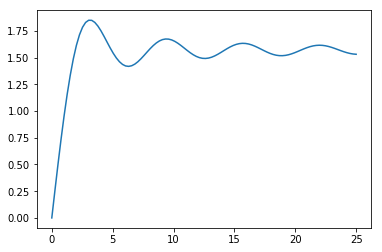

In [3]:
# We should do this with Lambdify, but NumPy
# doesn't know about Si and mpmath isn't a
# lot faster than SymPy so this works ok.
xx = np.linspace(0,25,100)
yy = np.array([Si.subs(x,xv).evalf() for xv in xx])
plt.plot(xx,yy)

0.00166666666666667*x**5 - 0.0555555555555556*x**3 + 1.0*x


Text(0, 0.5, 'Fractional error')

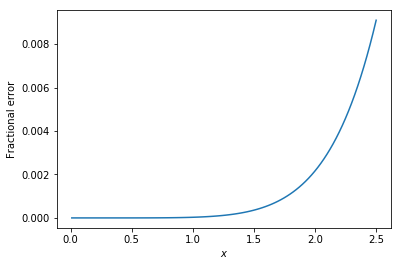

In [37]:
## First we can compare the power series.
ss,sgn = 0,1
for k in range(3):
    ss += sgn * x**(2*k+1)/mp.factorial(2*k+1)/(2*k+1)
    sgn = -sgn
print(ss)
#
xx = np.linspace(0.01,2.5,100)
ex = np.array([Si.subs(x,xv).evalf() for xv in xx])
ap = np.array([ss.subs(x,xv).evalf() for xv in xx])
#
plt.plot(xx,np.abs((ap-ex)/ex))
plt.xlabel(r'$x$')
plt.ylabel(r'Fractional error')

Text(0, 0.5, 'Fractional error')

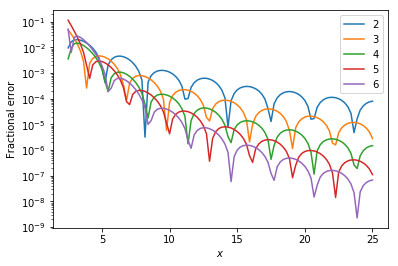

In [12]:
# Now let's compare how well the asymptotics do compared to the full
# expression.
xx = np.linspace(2.5,25,100)
ex = np.array([Si.subs(x,xv).evalf() for xv in xx])
# The approximations with increasing order...
ap2 = sp.pi/2 - sp.cos(x)/x*(1) - sp.sin(x)/x**2
ap3 = sp.pi/2 - sp.cos(x)/x*(1-2/x**2) - sp.sin(x)/x*(1/x)
ap4 = sp.pi/2 - sp.cos(x)/x*(1-2/x**2) - sp.sin(x)/x*(1/x-6/x**3)
ap5 = sp.pi/2 - sp.cos(x)/x*(1-2/x**2+24/x**4) - sp.sin(x)/x*(1/x-6/x**3)
ap6 = sp.pi/2 - sp.cos(x)/x*(1-2/x**2+24/x**4) - sp.sin(x)/x*(1/x-6/x**3+120/x**5)
#
for i,order in enumerate([ap2,ap3,ap4,ap5,ap6]):
    ap = np.array([order.subs(x,xv).evalf() for xv in xx])
    plt.plot(xx,np.abs((ap-ex)/ex),label=i+2)
plt.yscale('log')
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'Fractional error')

In [38]:
# And just to get some specific numbers:
for xv in [5.0,7.5,10.0,20.]:
    e4 = ((Si - ap4)/Si).subs(x,xv).evalf()
    e5 = ((Si - ap5)/Si).subs(x,xv).evalf()
    e6 = ((Si - ap6)/Si).subs(x,xv).evalf()
    print("At x={:5.2f} fractional error is {:12.4e}, {:12.4e}, {:12.4e}".\
          format(xv,e4,e5,e6))

At x= 5.00 fractional error is    1.4049e-3,    2.8104e-3,   -1.9411e-3
At x= 7.50 fractional error is   -4.2579e-4,   -1.9373e-4,    2.2492e-4
At x=10.00 fractional error is    1.2570e-4,    4.2705e-6,   -3.5096e-5
At x=20.00 fractional error is   -2.8519e-6,   -8.7511e-7,    2.3051e-7


In [39]:
# Let's build the auxilliary functions in a loop.
cex = 1 + 0*x
sgn = -1
for i in range(2,11,2):
    cex = cex + sgn * mp.factorial(i)/x**i
    sgn = -sgn
print('Cos:',cex)
#
sex = 0*x
sgn = 1
for i in range(1,10,2):
    sex = sex + sgn * mp.factorial(i)/x**i
    sgn = -sgn
print('Sin:',sex)

Cos: 1 - 2.0/x**2 + 24.0/x**4 - 720.0/x**6 + 40320.0/x**8 - 3628800.0/x**10
Sin: 1.0/x - 6.0/x**3 + 120.0/x**5 - 5040.0/x**7 + 362880.0/x**9


In [41]:
# Again let's get some specific numbers down for an error:
ap = sp.pi/2 - sp.cos(x)/x*cex - sp.sin(x)/x*sex
for xv in [5.0,7.5,10.0,20.0]:
    err = ((Si - ap)/Si).subs(x,xv).evalf()
    print("At x={:5.2f} fractional error is {:12.4e}".format(xv,err))

At x= 5.00 fractional error is   -2.8458e-2
At x= 7.50 fractional error is    1.1474e-4
At x=10.00 fractional error is    3.9236e-6
At x=20.00 fractional error is    3.1439e-9


The right thing to do in the intermediate regime is to use a rational function approximation.  Say
$$
  {\rm Si}(x) = \sum_{k=0}^\infty\frac{(-1)^k x^{2k+1}}{(2k+1)(2k+1)!}
  = x - \frac{x^3}{18} + \frac{x^5}{600} - \frac{x^7}{35280} + \cdots
  \approx\frac{x + a_3 x^3 + a_5 x^5}{1+b_2x^2 + b_4 x^4}
$$
Multiplying through by the $\sum_n b_n x^n$ we have
\begin{eqnarray}
  &&  \left( x - \frac{x^3}{18} + \frac{x^5}{600} + \cdots \right)\left(1+b_2x^2+b_4x^4\right) \\
  &=& x + x^3\left(b_2-\frac{1}{18}\right) + x^5\left(\frac{1}{600}-\frac{b_2}{18}+ b_4\right) + x^7\left(\frac{b_2}{600} - \frac{b_4}{18}-\frac{1}{35280}\right) + \cdots \\
  &=& x + a_3 x^3 + a_5 x^5
\end{eqnarray}
Requiring the coefficient of $x^9$ to be zero gives $b_4=b_2(5/294)$ and of $x^7$ to be zero gives $b_4=(3/100)b_2-1/1960$.  This gives $b_2=15/382$ and $b_4=25/37436$.  Matching the $x^3$ terms then gives $a_3=b_2-1/18=-28/1719$ and the $x^5$ term gives $a_5=17/14700-b_2(23/900)=859/5615400$.  So
$$
  {\rm Si}(x) \approx \frac{x-(28/1719)x^3+(859/5615400)x^5}{1+(15/382)x^2+(25/37436)x^4}
$$

Text(0, 0.5, 'Fractional error')

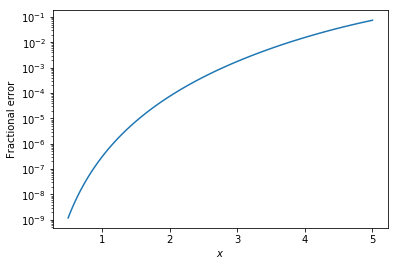

In [42]:
rat= (x-(28./1719.)*x**3+(859./5615400.)*x**5)/(1+(15./382.)*x**2+(25./37436.)*x**4)
xx = np.linspace(0.5,5,100)
ex = np.array([ Si.subs(x,xv).evalf() for xv in xx])
ap = np.array([rat.subs(x,xv).evalf() for xv in xx])
#
plt.plot(xx,np.abs((ap-ex)/ex))
plt.yscale('log')
plt.xlabel(r'$x$')
plt.ylabel(r'Fractional error')

In [43]:
for xv in [1.,2.,2.5,5.,7.5,10.]:
    err = ((Si - rat)/Si).subs(x,xv).evalf()
    print("At x={:5.2f} fractional error is {:12.4e}".format(xv,err))

At x= 1.00 fractional error is    3.0201e-7
At x= 2.00 fractional error is    7.4130e-5
At x= 2.50 fractional error is    4.2766e-4
At x= 5.00 fractional error is    7.4333e-2
At x= 7.50 fractional error is    4.7032e-1
At x=10.00 fractional error is    5.3189e-1


This works pretty well, certainly better than our power series, but clearly it's hard to get very, very small errors by hand.  Let's do this automatically, following the procedure developed in TableConstruction.

In [51]:
## Code to find the coefficiencts of a rational approximation to a tabulated function.
def find_rational(xi,fxi,A,B):
    """Finds the coefficients of the rational approximation to f(x)."""
    # First set up phi_{j\alpha}.  Can do this with cleverness, but let's
    # try to make the code more readable -- runtime isn't an issue.
    Ndata = len(xi)
    Nbase = A+B+1
    phi   = np.zeros( (Ndata,Nbase) )
    for i in range(Ndata):
        for a in range(Nbase):
            phi[i,a] = xi[i]**a if a<=A else (-fxi[i]*xi[i]**(a-A))
    # Now set up the "source" and solve for c.
    d = np.dot( fxi,phi )
    M = np.dot( phi.T,phi )
    c = np.dot( np.linalg.inv(M),d )
    num=np.poly1d(c[:A+1][::-1])
    den=np.poly1d(np.append(c[A+1:][::-1],1.0))
    return( (num,den) )
    #
# Choose points at random rather than trying something sophisticated. To
# enforce the odd-ness of Si mirror x->-x in our fit.
xx = np.sort(np.random.uniform(low=0,high=10.,size=750))
xx = np.sort(np.append(xx,-xx))
fx = np.array([Si.subs(x,xv) for xv in xx])
# Let's look for a polynomial with one higher order in
# the numerator than the denominator.
A,B     = 9,8
num,den = find_rational(xx,fx,A,B)
print(num)
print(den)
print("Maximum error {:10.4f}%".format(100*np.max(np.abs(fx-num(xx)/den(xx))/fx)))

           9             8            7             6             5
1.614e-08 x + 6.187e-15 x - 5.77e-06 x - 2.168e-12 x + 0.0007952 x
              4           3             2
 + 1.158e-10 x - 0.03647 x - 3.603e-09 x + 1 x + 5.241e-11
          8             7             6             5             4
9.99e-09 x - 3.747e-14 x + 1.115e-06 x + 6.099e-13 x + 0.0001909 x
              3           2
 - 1.046e-10 x + 0.01907 x - 3.513e-09 x + 1
Maximum error     0.0016%


Note, the even powers in the numerator and the odd powers in the denominator are "0" to within round-off error as required by the odd symmetry of our function.

So the combination of a rational function approximation for $|x|<10$ and then our asymptotic expansion for $|x|>10$ would do better than about $0.002\%$ across the entire range.  This is not bad for a start!